# Breadth First Search



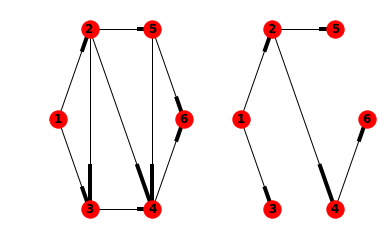

In [20]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(4,6),(5,4),(5,6)])
plt.subplot(121)
shells=[[6,5,2,1,3,4]]
nx.draw_shell(G, nlist=shells, with_labels=True, font_weight='bold')
T = nx.bfs_tree(G, source=1)
plt.subplot(122)
nx.draw_shell(T, nlist=shells, with_labels=True, font_weight='bold')
plt.show()

## Linear Algebraic approach to Breadth First Search

<IPython.core.display.Javascript object>

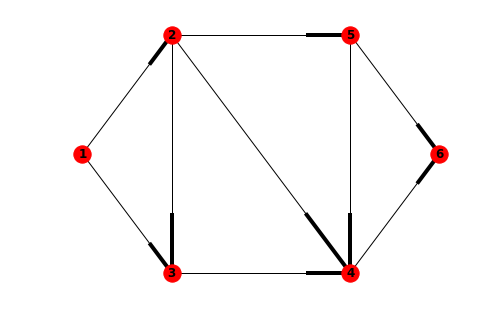

[[0 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 1]
 [0 0 0 0 0 0]]
x= [1 0 0 0 0 0]


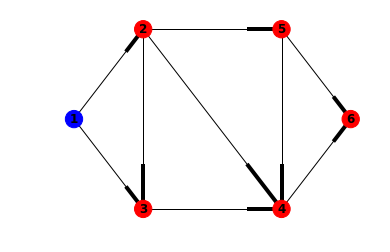

x= [0 1 1 0 0 0]


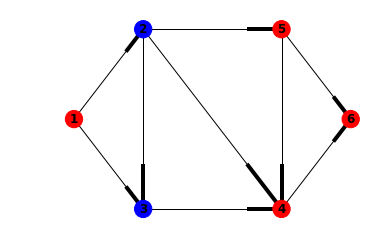

x= [0 0 1 2 1 0]


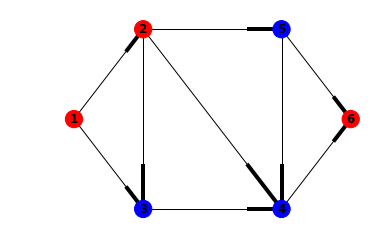

x= [0 0 0 2 0 3]


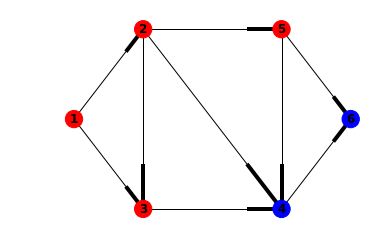

x= [0 0 0 0 0 2]


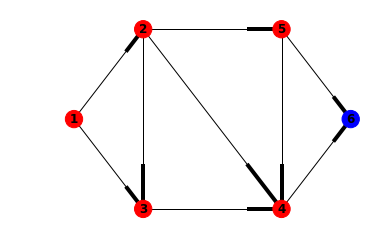

In [37]:
from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""

display(Javascript(disable_js))
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import bsr_matrix, csr_matrix
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(4,6),(5,4),(5,6)])
shells=[[6,5,2,1,3,4]]
nx.draw_shell(G, nlist=shells, with_labels=True, font_weight='bold')
plt.show()
A = nx.adjacency_matrix(G)
print A.toarray()
A_t = A.transpose().copy()
x = np.zeros((6,1), dtype=int,)
x[0] = 1
t = 1
while True:
    y = A_t*x
    print "x=", x.reshape(-1,)
    node_color = ["b" if i in x.nonzero()[0] else "r" for i in range(6)]
    nx.draw_networkx(G, pos=nx.shell_layout(G, shells), node_color=node_color, font_weight='bold')
    ax = plt.gca()
    plt.axis("off")
    plt.show()
    t += 1
    if np.array_equal(x,y):
        break
    elif t < A.shape[0]:
       x = y
    else:
        break

        